In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
tweets = pd.read_csv('Tweets.csv')

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

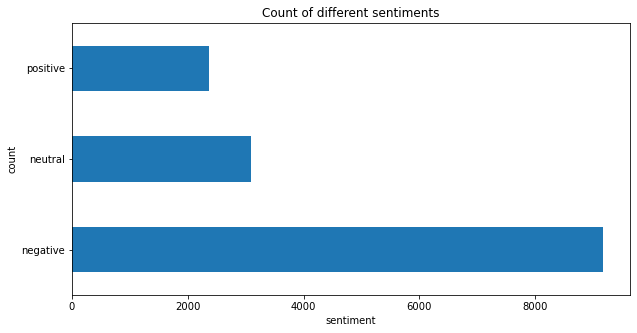

In [7]:
plt.figure(figsize=(10,5))
tweets['airline_sentiment'].value_counts().plot(kind='barh')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Count of different sentiments')
plt.show()

In [8]:
sentiment_airline = tweets.groupby(by=['airline_sentiment','airline']).size().unstack()

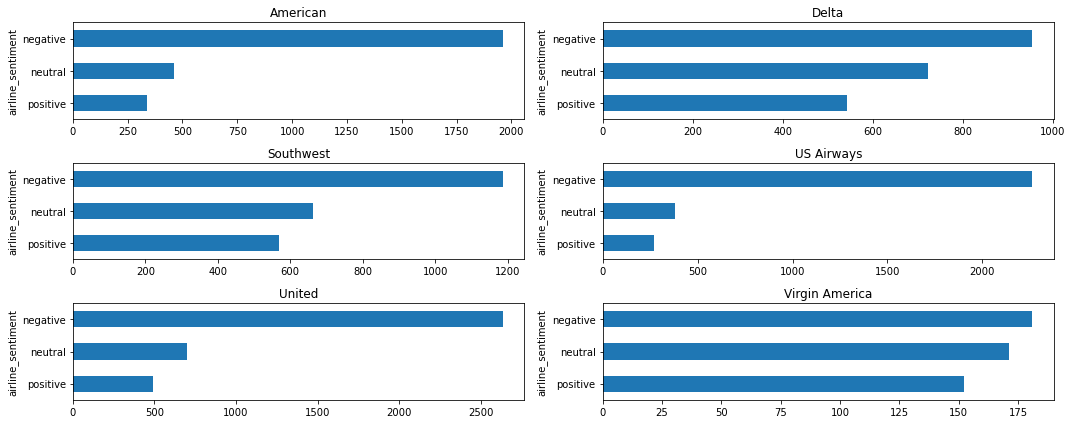

In [9]:
fig, axes = plt.subplots(3,2, figsize=(15,6))
for i, (label,col) in enumerate(sentiment_airline.iteritems()):
    a = axes[int(i/2), i%2]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=a)
    a.set_title(label)
plt.tight_layout()

In [10]:
tweets = tweets[['airline_sentiment','airline','text']]

In [11]:
final = tweets.copy()
final.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [12]:
final['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
sentiment_value = {'negative':-1,'neutral':0,'positive':1}

In [14]:
final['airline_sentiment'] = final['airline_sentiment'].map(sentiment_value)

In [15]:
final['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [16]:
le = LabelEncoder()
final['airline'] = le.fit_transform(final['airline'])

In [17]:
final.head()

,airline_sentiment,airline,text
0,0,5,@VirginAmerica What @dhepburn said.
1,1,5,@VirginAmerica plus you've added commercials t...
2,0,5,@VirginAmerica I didn't today... Must mean I n...
3,-1,5,@VirginAmerica it's really aggressive to blast...
4,-1,5,@VirginAmerica and it's a really big bad thing...


In [18]:
tweet = []
for i in final['text']:
    cus_rev = re.sub('[^a-zA-Z]',' ',i)
    cus_rev = cus_rev.lower()
    cus_rev = cus_rev.split()
    clean_rev = [ps.stem(word) for word in cus_rev if not word in set(stopwords.words('english'))]
    tweet.append(clean_rev)

In [19]:
tweet

[['virginamerica', 'dhepburn', 'said'],
 ['virginamerica', 'plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['virginamerica', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip'],
 ['virginamerica',
  'realli',
  'aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'amp',
  'littl',
  'recours'],
 ['virginamerica', 'realli', 'big', 'bad', 'thing'],
 ['virginamerica',
  'serious',
  'would',
  'pay',
  'flight',
  'seat',
  'play',
  'realli',
  'bad',
  'thing',
  'fli',
  'va'],
 ['virginamerica',
  'ye',
  'nearli',
  'everi',
  'time',
  'fli',
  'vx',
  'ear',
  'worm',
  'go',
  'away'],
 ['virginamerica',
  'realli',
  'miss',
  'prime',
  'opportun',
  'men',
  'without',
  'hat',
  'parodi',
  'http',
  'co',
  'mwpg',
  'grezp'],
 ['virginamerica', 'well'],
 ['virginamerica', 'amaz', 'arriv', 'hour', 'earli', 'good'],
 ['virginamerica',
  'know',
  'suicid',
  'second',
  'lead',
  'caus',
  'death',
  'among',
  'teen'],
 ['virginamerica',
  'lt',
  'pret

In [20]:
new_clean = []
for j in range(len(tweet)):
    new_clean.append(tweet[j][1:])

In [21]:
final['clean'] = new_clean

In [22]:
final.head()

,airline_sentiment,airline,text,clean
0,0,5,@VirginAmerica What @dhepburn said.,"[dhepburn, said]"
1,1,5,@VirginAmerica plus you've added commercials t...,"[plu, ad, commerci, experi, tacki]"
2,0,5,@VirginAmerica I didn't today... Must mean I n...,"[today, must, mean, need, take, anoth, trip]"
3,-1,5,@VirginAmerica it's really aggressive to blast...,"[realli, aggress, blast, obnoxi, entertain, gu..."
4,-1,5,@VirginAmerica and it's a really big bad thing...,"[realli, big, bad, thing]"


In [23]:
final.shape

(14640, 4)

In [24]:
final['clean'] = final['clean'].str.join(" ")

In [25]:
final.drop(columns=['text'],inplace=True)

In [26]:
final.head()

,airline_sentiment,airline,clean
0,0,5,dhepburn said
1,1,5,plu ad commerci experi tacki
2,0,5,today must mean need take anoth trip
3,-1,5,realli aggress blast obnoxi entertain guest fa...
4,-1,5,realli big bad thing


In [58]:
features = final['clean']
target = final['airline_sentiment']

In [59]:
vectorizer = TfidfVectorizer(max_features=15000)
features = vectorizer.fit_transform(features).toarray()

In [60]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [61]:
x_train.shape

(11712, 10776)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
pred_knn = knn.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [65]:
accuracy_score(pred_knn,y_test)

0.6943306010928961

In [66]:
confusion_matrix(pred_knn,y_test)

array([[1849,  493,  329],
       [  22,   67,   13],
       [  18,   20,  117]], dtype=int64)

Storing the model and the vectorizer in a pickle file

In [69]:
import pickle

In [74]:
with open('analyzer.pickle','wb') as file:
    pickle.dump(vectorizer,file)

In [75]:
with open('model.pickle','wb') as file:
    pickle.dump(knn,file)